# **Импорты**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, Markdown

# **Загрузка данных**

In [2]:
import pandas as pd
import gdown
url = "https://drive.google.com/uc?export=download&id=1PflRjjV8Mg0qqGnd3ZUeaMl-Ek7-qmac"
output = 'train.csv'
gdown.download(url, output, quiet=False)
df = pd.read_csv('train.csv')
print(df.head())
df.info()

Downloading...
From: https://drive.google.com/uc?export=download&id=1PflRjjV8Mg0qqGnd3ZUeaMl-Ek7-qmac
To: /content/train.csv
100%|██████████| 3.36M/3.36M [00:00<00:00, 50.6MB/s]


  ApplicationDate   Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0      2010-06-26  27.0       66829.0        549.0     17290.0          60.0   
1      1996-09-23  55.0      172147.0        850.0     16110.0          36.0   
2      2015-01-19  51.0      300000.0        850.0     38436.0          36.0   
3      1981-05-12  25.0       34683.0        847.0     19186.0          48.0   
4      1995-05-07  55.0      300000.0        850.0     30437.0          48.0   

  MaritalStatus  NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0      Divorced                 1.0                Rent               1095.0   
1       Widowed                 1.0            Mortgage                211.0   
2       Married                 0.0            Mortgage                546.0   
3       Married                 0.0               Other                153.0   
4        Single                 2.0                Rent                562.0   

   ...  JobTenure  EmploymentStatus  E

In [3]:
url = "https://drive.google.com/uc?export=download&id=1YEtfBEtqQP7xQwYX0qhJeLv5OAZjqHbk"
output = 'test.csv'
gdown.download(url, output, quiet=False)
df_test = pd.read_csv('test.csv')
print(df.head())
df_test.info()

Downloading...
From: https://drive.google.com/uc?export=download&id=1YEtfBEtqQP7xQwYX0qhJeLv5OAZjqHbk
To: /content/test.csv
100%|██████████| 1.34M/1.34M [00:00<00:00, 59.3MB/s]

  ApplicationDate   Age  AnnualIncome  CreditScore  LoanAmount  LoanDuration  \
0      2010-06-26  27.0       66829.0        549.0     17290.0          60.0   
1      1996-09-23  55.0      172147.0        850.0     16110.0          36.0   
2      2015-01-19  51.0      300000.0        850.0     38436.0          36.0   
3      1981-05-12  25.0       34683.0        847.0     19186.0          48.0   
4      1995-05-07  55.0      300000.0        850.0     30437.0          48.0   

  MaritalStatus  NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0      Divorced                 1.0                Rent               1095.0   
1       Widowed                 1.0            Mortgage                211.0   
2       Married                 0.0            Mortgage                546.0   
3       Married                 0.0               Other                153.0   
4        Single                 2.0                Rent                562.0   

   ...  JobTenure  EmploymentStatus  E

# **Очистка данных**

In [4]:
lower_bound = -1_000_000
upper_bound = 1_000_000

df_cleaned = df[(df['RiskScore'] > lower_bound) & (df['RiskScore'] < upper_bound)].copy()

original_rows = len(df)
cleaned_rows = len(df_cleaned)
df_imputed = df_cleaned.copy()
numeric_cols = df_imputed.select_dtypes(include=np.number).columns
for col in numeric_cols:
      median_val = df_imputed[col].median()
      df_imputed[col] = df_imputed[col].fillna(median_val)
display(Markdown(f"Исходное количество строк: `{original_rows}`."))
display(Markdown(f"Количество строк после очистки: `{cleaned_rows}`."))

Исходное количество строк: `11017`.

Количество строк после очистки: `10272`.

# **Разведочный анализ данных (EDA)**

**Неочищенные данные**

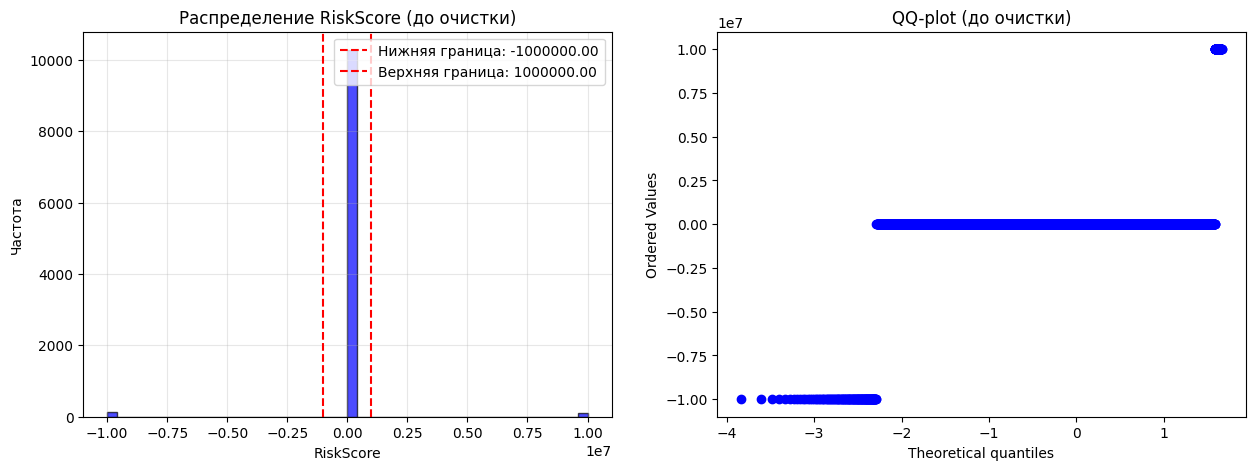

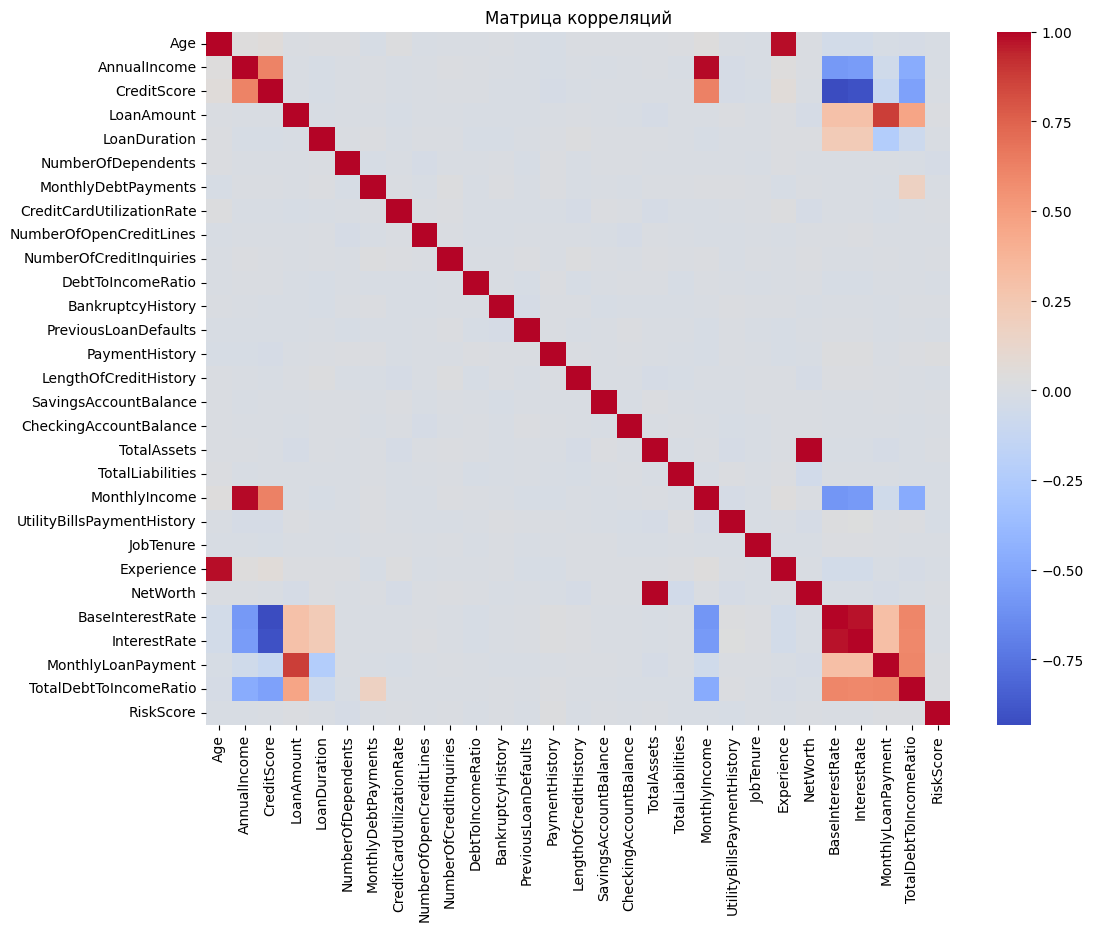

**4 самых коррелирующих с RiskScore признаков:**

,RiskScore
RiskScore,1.000000
PaymentHistory,0.019144
TotalDebtToIncomeRatio,0.013879
MonthlyLoanPayment,0.012366
LoanAmount,0.011771


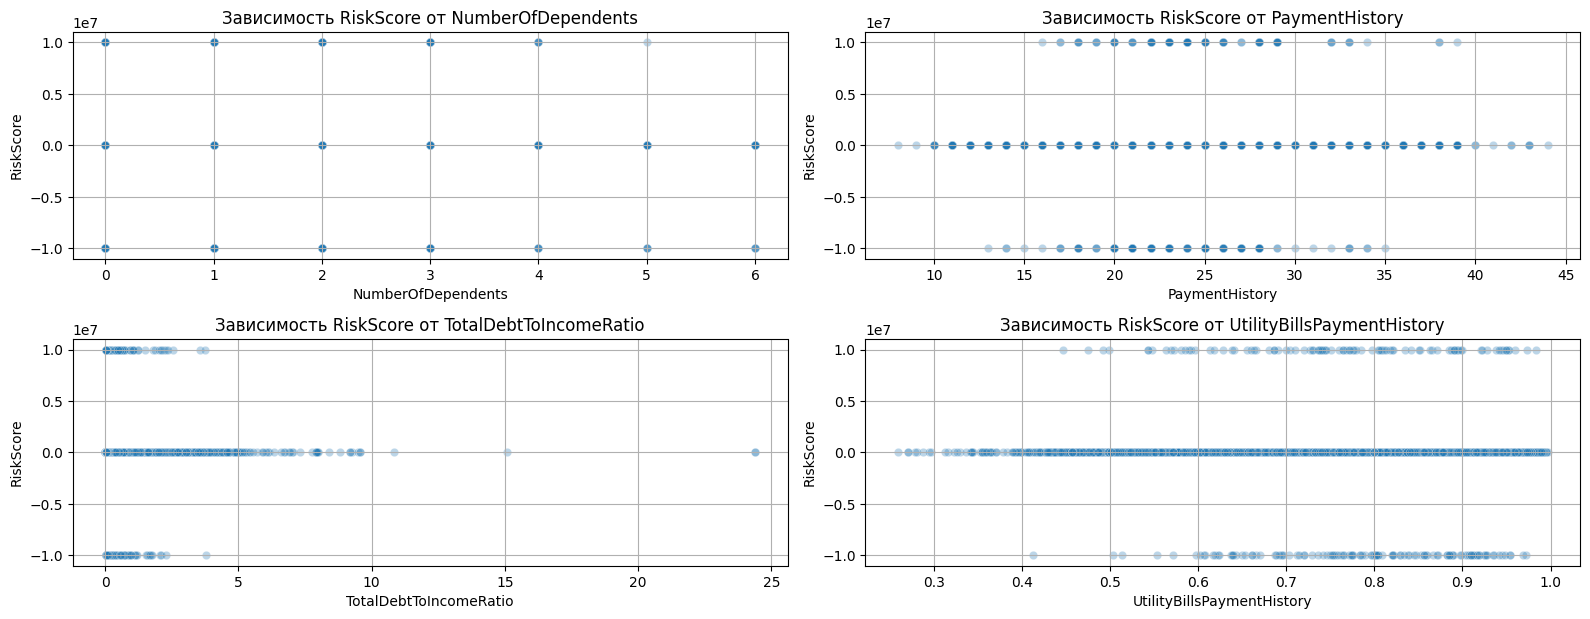

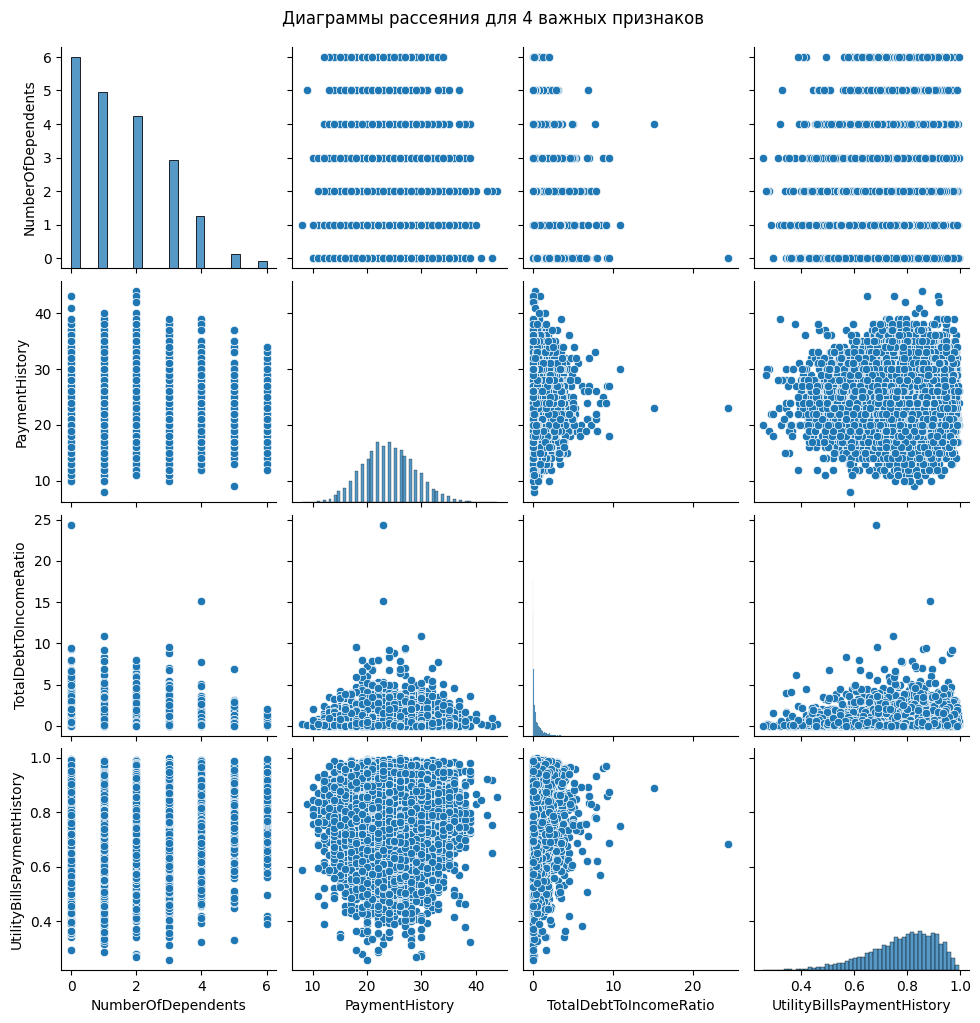

In [5]:
target_col = 'RiskScore'
original_data = df[target_col]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(original_data, bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].axvline(lower_bound, color='red', linestyle='--', label=f'Нижняя граница: {lower_bound:.2f}')
axes[0].axvline(upper_bound, color='red', linestyle='--', label=f'Верхняя граница: {upper_bound:.2f}')
axes[0].set_title(f'Распределение {target_col} (до очистки)')
axes[0].set_xlabel(target_col)
axes[0].set_ylabel('Частота')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

from scipy import stats
stats.probplot(original_data, dist="norm", plot=axes[1])
axes[1].set_title('QQ-plot (до очистки)')

only_numerical_columns = df.select_dtypes(include=np.number)
correlation_matrix = only_numerical_columns.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

display(Markdown("**4 самых коррелирующих с RiskScore признаков:**"))
corr_with_target = correlation_matrix['RiskScore'].sort_values(ascending=False)
display(corr_with_target.head(5))

corr_with_target_abs = correlation_matrix['RiskScore'].abs().sort_values(ascending=False)
top_features = corr_with_target_abs[1:5].index

plt.figure(figsize=(16, 12))
for i, feature in enumerate(top_features, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(x=df[feature], y=df['RiskScore'], alpha=0.3)
    corr_coef = df[feature].corr(df['RiskScore'])
    plt.title(f'Зависимость RiskScore от {feature}')
    plt.grid(True)
plt.tight_layout()
plt.show()

pairplot_features = top_features[:4]
sns.pairplot(df[list(pairplot_features)])
plt.suptitle('Диаграммы рассеяния для 4 важных признаков', y=1.02)
plt.show()

**Вывод**: Неочищенные данные содержат экстремальные выбросы, из-за них данные особо не коррелируют друг с другом. (За исключением очевидных корреляций между Age и Experience или MonthlyIncome и AnnualIncome)

**Очищенные данные**

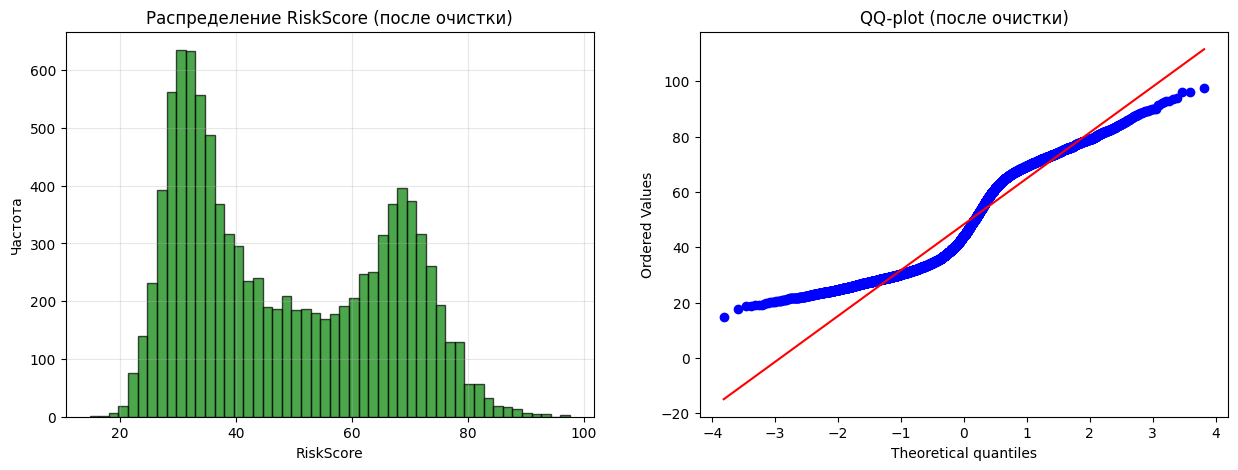

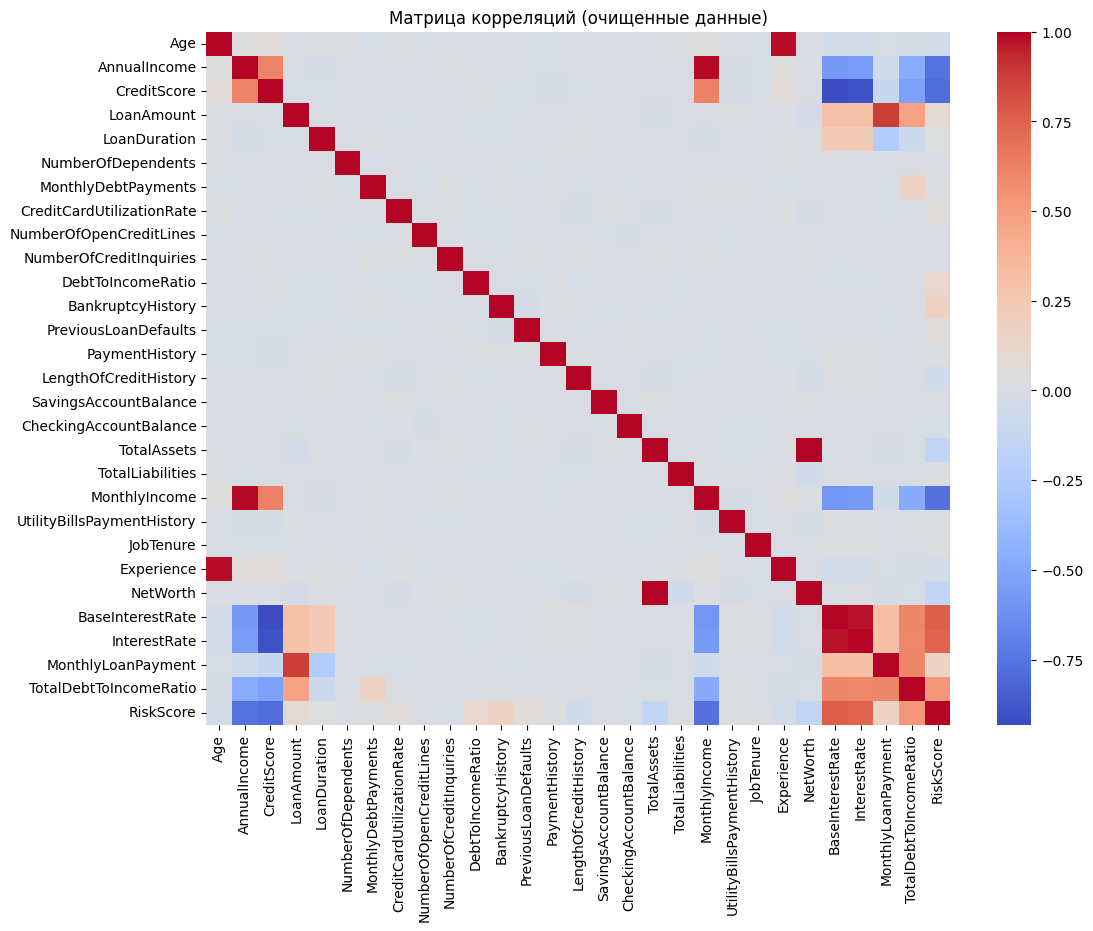

**4 самых коррелирующих с RiskScore признака после очистки:**

,RiskScore
RiskScore,1.000000
BaseInterestRate,0.758712
InterestRate,0.742634
TotalDebtToIncomeRatio,0.530729
BankruptcyHistory,0.177559


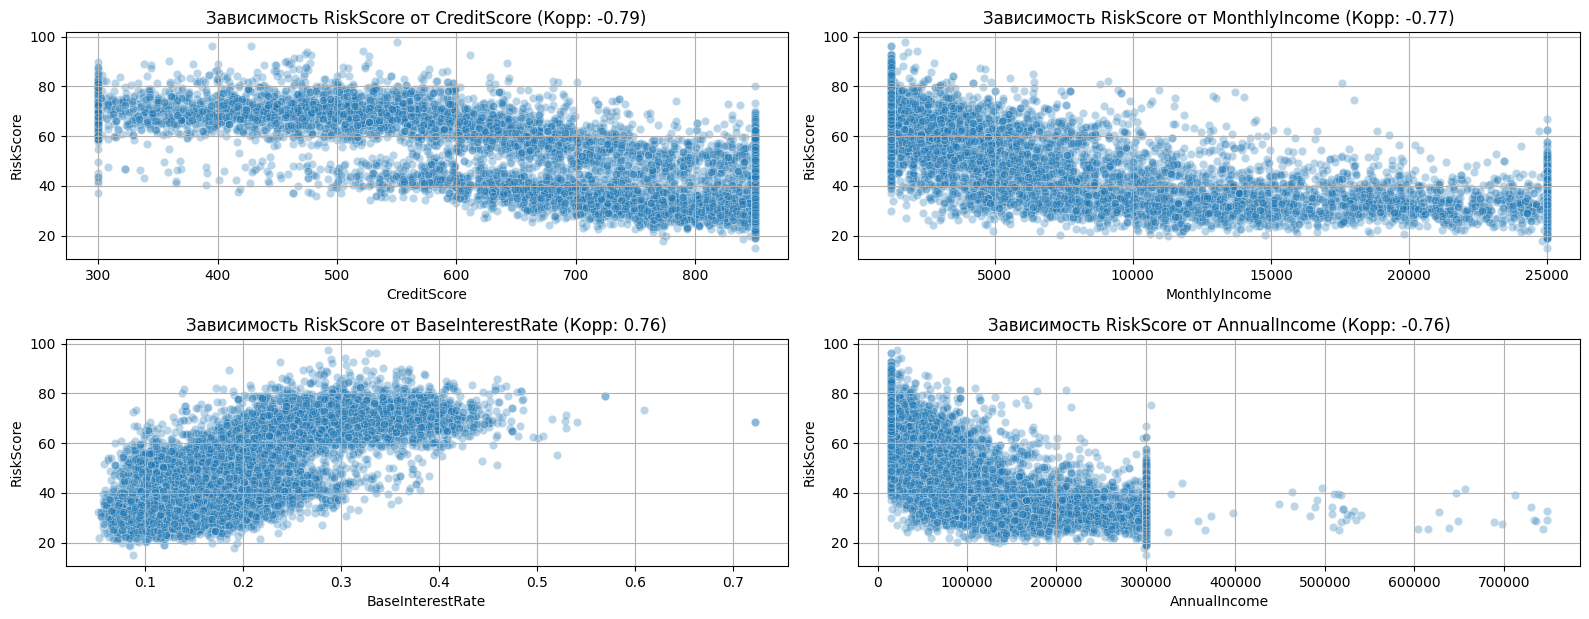

In [6]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(df_cleaned[target_col], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[0].set_title(f'Распределение {target_col} (после очистки)')
axes[0].set_xlabel(target_col)
axes[0].set_ylabel('Частота')
axes[0].grid(True, alpha=0.3)

stats.probplot(df_cleaned[target_col], dist="norm", plot=axes[1])
axes[1].set_title('QQ-plot (после очистки)')

numeric_cols_cleaned = df_cleaned.select_dtypes(include=np.number)
correlation_matrix_cleaned = numeric_cols_cleaned.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix_cleaned, annot=False, cmap='coolwarm')
plt.title('Матрица корреляций (очищенные данные)')
plt.show()

corr_with_target_cleaned = correlation_matrix_cleaned['RiskScore'].abs().sort_values(ascending=False)
top_features_cleaned = corr_with_target_cleaned[1:5].index

display(Markdown("**4 самых коррелирующих с RiskScore признака после очистки:**"))
corr_with_target_cleaned = correlation_matrix_cleaned['RiskScore'].sort_values(ascending=False)
display(corr_with_target_cleaned.head(5))

plt.figure(figsize=(16, 12))
for i, feature in enumerate(top_features_cleaned, 1):
      plt.subplot(4, 2, i)
      sns.scatterplot(x=df_cleaned[feature], y=df_cleaned['RiskScore'], alpha=0.3)
      corr_coef = df_cleaned[feature].corr(df_cleaned['RiskScore'])
      plt.title(f'Зависимость RiskScore от {feature} (Корр: {corr_coef:.2f})')
      plt.grid(True)

plt.tight_layout()
plt.show()

**Вывод:** После очистки распределение RiskScore пришло в адекватный вид. Теперь мы можем заметить явную обратную корреляцию между RiskScore и CreditScore, а также RiskScore и MonthlyIncome и прямую корреляцию RiskScore с InterestRate и BaseInterestRate

# **Нормализация данных**

In [7]:
from IPython.display import display, Markdown
import pandas as pd
import numpy as np

try:
    def z_score_scaler(data):
        mean = np.mean(data, axis=0)
        std = np.std(data, axis=0, ddof=0)
        std[std == 0] = 1

        return (data - mean) / std

    def min_max_scaler(data):
        min_val = np.min(data, axis=0)
        max_val = np.max(data, axis=0)
        range_val = max_val - min_val

        range_val[range_val == 0] = 1

        return (data - min_val) / range_val

    numeric_features = df_imputed.select_dtypes(include=np.number)
    if 'RiskScore' in numeric_features.columns:
        numeric_features = numeric_features.drop('RiskScore', axis=1)
    numeric_feature_names = numeric_features.columns

    df_numeric_imputed = df_imputed[numeric_feature_names]

    z_scaled_values = z_score_scaler(df_numeric_imputed.values)
    df_z_scaled = pd.DataFrame(z_scaled_values, columns=numeric_feature_names)

    min_max_scaled_values = min_max_scaler(df_numeric_imputed.values)
    df_min_max_scaled = pd.DataFrame(min_max_scaled_values, columns=numeric_feature_names)

    print("=====================")
    print("Z-score нормализация:")
    print("=====================")
    display(df_z_scaled.head())

    z_stats = df_z_scaled.describe().loc[['mean', 'std']]
    z_stats_rounded = z_stats.round(10)
    display(z_stats_rounded)

    print()
    print("=====================")
    print("Min-max нормализация:")
    print("=====================")
    display(df_min_max_scaled.head())

    min_max_stats = df_min_max_scaled.describe().loc[['min', 'max']]
    display(min_max_stats)

except Exception as e:
    display(Markdown("**Нет необходимых данных**"))
    print(f"Ошибка: {e}")

Z-score нормализация:


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,-1.108451,-0.558650,-0.764119,-0.450467,0.268131,-0.400573,1.130185,-0.831696,-0.591929,0.022255,...,-0.263579,-0.560983,1.005394,-0.432306,-1.203829,-0.249562,0.629564,0.530862,-0.421499,-0.256612
1,1.304533,0.350659,0.991696,-0.493848,-0.710632,-0.400573,-0.668116,-0.682975,-0.016743,-0.989281,...,-0.019743,0.373890,0.103462,-1.340227,1.355815,-0.267441,-1.228873,-1.108086,-0.417278,-0.520888
2,0.959821,1.454535,0.991696,0.326929,-0.710632,-1.105987,0.013367,1.003963,-0.016743,-0.989281,...,-0.268894,1.508799,1.067638,-0.886267,0.914497,0.289764,-0.987194,-0.877497,0.140186,-0.496417
3,-1.280807,-0.836197,0.974196,-0.380764,-0.221251,-1.105987,-0.786104,-0.602935,2.284003,-0.989281,...,-0.318138,-0.846332,0.746299,-0.886267,-1.556883,-0.306845,-1.071088,-0.904643,-0.429240,-0.326289
4,1.304533,1.454535,0.991696,0.032859,-0.221251,0.304842,0.045915,-0.069843,-0.016743,0.022255,...,1.382131,1.508799,0.846062,0.021655,1.179288,-0.317311,-0.965533,-1.150906,-0.238737,-0.518511


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
mean,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,...,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000
std,1.000049,1.000049,1.000049,1.000049,1.000049,1.000049,1.000049,1.000049,1.000049,1.000049,...,1.000049,1.000049,1.000049,1.000049,1.000049,1.000049,1.000049,1.000049,1.000049,1.000049



Min-max нормализация:


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,0.145161,0.070659,0.452727,0.038827,0.444444,0.166667,0.099577,0.162808,0.166667,0.166667,...,0.001659,0.181856,0.880256,0.235294,0.070175,0.003025,0.306411,0.260441,0.016179,0.011566
1,0.596774,0.214240,1.000000,0.036003,0.222222,0.166667,0.018222,0.188832,0.250000,0.000000,...,0.007202,0.551393,0.729769,0.117647,0.578947,0.002309,0.050173,0.059359,0.016371,0.001826
2,0.532258,0.388544,1.000000,0.089423,0.222222,0.000000,0.049052,0.484029,0.250000,0.000000,...,0.001538,1.000000,0.890641,0.176471,0.491228,0.024634,0.083495,0.087650,0.041827,0.002728
3,0.112903,0.026834,0.994545,0.043363,0.333333,0.000000,0.012884,0.202839,0.583333,0.000000,...,0.000419,0.069063,0.837026,0.176471,0.000000,0.000730,0.071928,0.084320,0.015825,0.008998
4,0.596774,0.388544,1.000000,0.070284,0.333333,0.333333,0.050525,0.296124,0.250000,0.166667,...,0.039071,1.000000,0.853671,0.294118,0.543860,0.000311,0.086482,0.054106,0.024524,0.001914


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# **Реализация класса линейной регрессии**

In [8]:
import numpy as np
import pandas as pd
import time
from IPython.display import display, Markdown
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

if 'df_z_scaled' in locals() and 'df_imputed' in locals():
    X = df_z_scaled.to_numpy()
    y = df_imputed['RiskScore'].to_numpy()
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    class CustomLinearRegression:
        def __init__(self):
            self.weights = None

        def fit(self, X, y, method='analytical', learning_rate=0.01, n_iterations=1000):
            if method == 'analytical':
                self._fit_analytical(X, y)
            elif method == 'gd':
                self._fit_gradient_descent(X, y, learning_rate, n_iterations)
            elif method == 'sgd':
                self._fit_stochastic_gd(X, y, learning_rate, n_iterations)
            else:
                raise ValueError(f"Метод '{method}' не поддерживается")

        def _fit_analytical(self, X, y):
            try:
                self.weights = np.linalg.inv(X.T @ X) @ X.T @ y
            except np.linalg.LinAlgError:
                self.weights = np.linalg.lstsq(X, y, rcond=None)[0]

        def _fit_gradient_descent(self, X, y, learning_rate, n_iterations):
            n_samples, n_features = X.shape
            self.weights = np.zeros(n_features)

            for iteration in range(n_iterations):
                predictions = X @ self.weights
                errors = predictions - y
                gradient = (2 / n_samples) * X.T @ errors
                self.weights -= learning_rate * gradient

        def _fit_stochastic_gd(self, X, y, learning_rate, n_iterations):
            n_samples, n_features = X.shape
            self.weights = np.zeros(n_features)

            for iteration in range(n_iterations):
                for i in range(n_samples):
                    random_idx = np.random.randint(n_samples)
                    xi = X[random_idx:random_idx + 1]
                    yi = y[random_idx:random_idx + 1]

                    prediction = xi @ self.weights
                    error = prediction - yi
                    gradient = 2 * xi.T @ error
                    self.weights -= learning_rate * gradient

        def predict(self, X):
            if self.weights is None:
                raise RuntimeError("Модель не обучена. Сначала вызовите fit().")
            return X @ self.weights

        def score(self, X, y):
            y_pred = self.predict(X)
            ss_res = np.sum((y - y_pred) ** 2)
            ss_tot = np.sum((y - np.mean(y)) ** 2)
            return 1 - (ss_res / (ss_tot + 1e-8))

        def get_params(self, deep=True):
            return {"weights": self.weights}

        def set_params(self, **parameters):
            for param, value in parameters.items():
                setattr(self, param, value)
            return self

    model_analytical = CustomLinearRegression()
    model_analytical.fit(X_b, y, method='analytical')
    print("Аналитическая модель обучилась")

    model_gd = CustomLinearRegression()
    model_gd.fit(X_b, y, method='gd', learning_rate=0.01, n_iterations=5000)
    print("GD модель обучилась")

    model_sgd = CustomLinearRegression()
    model_sgd.fit(X_b, y, method='sgd', learning_rate=0.001, n_iterations=500)
    print("SGD модель обучилась")

    model_sklearn = SklearnLinearRegression(fit_intercept=False)
    model_sklearn.fit(X_b, y)
    print("Sklearn модель обучилась")

    comparison_data = {
        'Analytical': model_analytical.weights,
        'GradientDescent': model_gd.weights,
        'StochasticGD': model_sgd.weights,
        'Sklearn': model_sklearn.coef_
    }

    comparison_df = pd.DataFrame(comparison_data)
    feature_names = ['Intercept'] + list(df_z_scaled.columns)
    comparison_df.index = feature_names

    display(comparison_df.head(20))
else:
    display(Markdown("**Нет необходимых данных**"))

Аналитическая модель обучилась
GD модель обучилась
SGD модель обучилась
Sklearn модель обучилась


,Analytical,GradientDescent,StochasticGD,Sklearn
Intercept,48.358094,48.358094,48.287932,48.358094
Age,0.089214,0.086131,0.196455,0.089214
AnnualIncome,0.157996,-0.798401,0.020969,0.157996
CreditScore,-2.393959,-2.173070,-2.844983,-2.393959
LoanAmount,-0.196476,-0.266422,-0.183061,-0.196476
LoanDuration,-1.134991,-1.188626,-0.869902,-1.134991
NumberOfDependents,0.063786,0.062143,0.180586,0.063786
MonthlyDebtPayments,0.323423,0.319845,0.234660,0.323423
CreditCardUtilizationRate,0.816906,0.816653,0.905306,0.816906
NumberOfOpenCreditLines,-0.005152,-0.004718,-0.068938,-0.005152


**Сравнение**:
1. Аналитический метод - идеально совпадает с sklearn
2. Градиентный спуск - достаточно близок к sklearn, слегка медленнее
3. Стохастический градиентный спуск - нужно тщательно подбирать гиперпараметры, чтобы получить прблизительно равные с sklearn значения. Значительно медленнее

# **Метрики (MSE, R^2, MAPE, MAE)**

In [9]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

if 'model_analytical' in locals() and 'X_b' in locals() and 'y' in locals():
    y_true = y
    y_pred = model_analytical.predict(X_b)

    def mse(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def mae(y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

    def r2(y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot)

    def mape(y_true, y_pred):
        epsilon = 1e-8
        return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

    mse_val = mse(y_true, y_pred)
    mae_val = mae(y_true, y_pred)
    r2_val = r2(y_true, y_pred)
    mape_val = mape(y_true, y_pred)
    sklearn_mse_val = mean_squared_error(y_true, y_pred)
    sklearn_mae_val = mean_absolute_error(y_true, y_pred)
    sklearn_r2_val = r2_score(y_true, y_pred)
    sklearn_mape_val = mean_absolute_percentage_error(y_true, y_pred) * 100

    results_df = pd.DataFrame({
        'Custom': [mse_val, mae_val, r2_val, mape_val],
        'Sklearn': [sklearn_mse_val, sklearn_mae_val, sklearn_r2_val, sklearn_mape_val]
    }, index=['MSE', 'MAE', 'R2', 'MAPE'])
    results_df.loc['R2', 'Sklearn'] = sklearn_r2_val

    display(results_df)

else:
    display(Markdown("**Нет необходимых данных**"))

,Custom,Sklearn
MSE,53.196339,53.196339
MAE,5.843071,5.843071
R2,0.821032,0.821032
MAPE,13.714009,13.714009


# **Кросс-валидация**

In [10]:
import numpy as np
from IPython.display import display, Markdown


if 'CustomLinearRegression' in locals() and 'X_b' in locals() and 'y' in locals():

    def k_fold(model_class, X, y, k=5, n_models=10, is_bagged=False, **kwargs):
        n_samples = X.shape[0]

        indices = np.random.permutation(n_samples)
        fold_indices = np.array_split(indices, k)
        scores = []

        for i in range(k):
            test_idx = fold_indices[i]
            train_idx = np.concatenate([fold_indices[j] for j in range(k) if j != i])
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            if is_bagged:
              model = CustomLinearRegression()
            else:
              model = model_class()

            model.fit(X_train, y_train, method='analytical')
            predictions = model.predict(X_test)
            score = mse(y_test, predictions)
            scores.append(score)

            print(f"Fold {i + 1}: MSE = {score:.4f}")

        return scores

    def leave_one_out(model, X, y):
        n_samples = X.shape[0]
        scores = []

        for i in range(n_samples):
            X_test, y_test = X[i:i+1], y[i:i+1]

            X_train = np.delete(X, i, axis=0)
            y_train = np.delete(y, i, axis=0)

            model.fit(X_train, y_train, method='analytical')

            prediction = model.predict(X_test)
            score = mse(y_test, prediction)
            scores.append(score)

        return scores

    print("Тестируем кросс-валидацию K-Fold (k=10):")
    model_for_kfold = CustomLinearRegression()
    kfold_scores = k_fold(CustomLinearRegression, X_b, y, k=10, is_bagged=False, n_models=10, method='analytical')
    print(f"Mean MSE: {np.mean(kfold_scores):.4f}")
    print(f"Std: {np.std(kfold_scores):.4f}")

    print("Тестируем кросс-валидацию Leave-One-Out:")
    X_small, y_small = X_b, y
    model_for_loo = CustomLinearRegression()
    loo_scores = leave_one_out(model_for_loo, X_small, y_small)
    print(f"Mean MSE: {np.mean(loo_scores):.4f}")
    print(f"Std: {np.std(loo_scores):.4f}")

else:
    display(Markdown("**Нет необходимых данных**"))

Тестируем кросс-валидацию K-Fold (k=10):
Fold 1: MSE = 48.8871
Fold 2: MSE = 61.4628
Fold 3: MSE = 52.5527
Fold 4: MSE = 53.7315
Fold 5: MSE = 55.8139
Fold 6: MSE = 55.2414
Fold 7: MSE = 51.5103
Fold 8: MSE = 51.4998
Fold 9: MSE = 52.0300
Fold 10: MSE = 54.3390
Mean MSE: 53.7069
Std: 3.2314
Тестируем кросс-валидацию Leave-One-Out:
Mean MSE: 53.6896
Std: 90.9795


# **Регуляризация (L1, L2, ElasticNet, Lp)**

In [11]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

if 'CustomLinearRegression' in locals():
    class LinearRegressionWithReg(CustomLinearRegression):
        def __init__(self, alpha=0.1, l1_ratio=0.5, p=1.5):
            super().__init__()
            self.alpha = alpha
            self.l1_ratio = l1_ratio
            self.p = p

        def fit(self, X, y, method='gd', reg_method='l2', learning_rate=0.01, n_iterations=8000):
            if method == 'gd':
                self._fit_gd_regularized(X, y, reg_method, learning_rate, n_iterations)
            elif method == 'analytical':
                self._fit_analytical(X, y, reg_method, self.alpha, self.l1_ratio,self.p)
            else:
                raise ValueError("Для данного метода регуляризация не предусмотрена")

        def _fit_gd_regularized(self, X, y, reg_method, learning_rate, n_iterations):
            n_samples, n_features = X.shape
            self.weights = np.zeros(n_features)

            for _ in range(n_iterations):
                predictions = X @ self.weights
                errors = predictions - y

                weights_for_reg = self.weights.copy()
                weights_for_reg[0] = 0

                gradient = (2 / n_samples) * X.T @ errors

                if reg_method == 'l2':
                    gradient += 2 * self.alpha * weights_for_reg
                elif reg_method == 'l1':
                    gradient += self.alpha * np.sign(weights_for_reg)
                elif reg_method == 'elasticnet':
                    l1_grad = self.alpha * self.l1_ratio * np.sign(weights_for_reg)
                    l2_grad = 2 * self.alpha * (1 - self.l1_ratio) * weights_for_reg
                    gradient += l1_grad + l2_grad
                elif reg_method == 'lp':
                    epsilon = 1e-8
                    lp_grad = self.alpha * self.p * np.sign(weights_for_reg) * (np.abs(weights_for_reg) ** (self.p - 1) + epsilon)
                    gradient += lp_grad

                self.weights -= learning_rate * gradient

        def _fit_analytical(self, X, y, reg_method='l2', alpha=0.01, l1_ratio=0.5, p=1.5):
            n_samples, n_features = X.shape

            try:
                if reg_method is None or alpha == 0:
                    self.weights = np.linalg.inv(X.T @ X) @ X.T @ y

                elif reg_method == 'l2':
                    regularization_matrix = alpha * np.eye(n_features)
                    regularization_matrix[0, 0] = 0

                    self.weights = np.linalg.inv(X.T @ X + regularization_matrix) @ X.T @ y

                elif reg_method == 'l1':
                    initial_weights = np.linalg.inv(X.T @ X) @ X.T @ y

                    epsilon = 1e-8
                    weights_abs = np.abs(initial_weights)
                    weights_abs[0] = 1

                    W_inv = np.diag(1.0 / (weights_abs + epsilon))
                    regularization_matrix = alpha * W_inv

                    self.weights = np.linalg.inv(X.T @ X + regularization_matrix) @ X.T @ y

                elif reg_method == 'elasticnet':
                    initial_weights = np.linalg.inv(X.T @ X) @ X.T @ y

                    epsilon = 1e-8
                    weights_abs = np.abs(initial_weights)
                    weights_abs[0] = 1

                    W_l1_inv = np.diag(1.0 / (weights_abs + epsilon))
                    l1_matrix = alpha * l1_ratio * W_l1_inv

                    l2_matrix = alpha * (1 - l1_ratio) * np.eye(n_features)
                    l2_matrix[0, 0] = 0
                    regularization_matrix = l1_matrix + l2_matrix

                    self.weights = np.linalg.inv(X.T @ X + regularization_matrix) @ X.T @ y

                elif reg_method == 'lp':
                    initial_weights = np.linalg.inv(X.T @ X) @ X.T @ y

                    epsilon = 1e-8
                    weights_abs = np.abs(initial_weights)
                    weights_abs[0] = 1

                    W_p_inv = np.diag(1.0 / (weights_abs ** (p - 1) + epsilon))
                    regularization_matrix = alpha * p * W_p_inv

                    self.weights = np.linalg.inv(X.T @ X + regularization_matrix) @ X.T @ y

                else:
                    raise ValueError(f"Неизвестный метод регуляризации: {reg_method}")

            except np.linalg.LinAlgError:
                display(Markdown("Матрица вырожденная, используем псевдообратную."))
                if reg_method == 'l2' and alpha > 0:
                    regularization_matrix = alpha * np.eye(n_features)
                    regularization_matrix[0, 0] = 0
                    self.weights = np.linalg.pinv(X.T @ X + regularization_matrix) @ X.T @ y
                else:
                    self.weights = np.linalg.pinv(X.T @ X) @ X.T @ y

    base_model = CustomLinearRegression()
    base_model.fit(X_b, y, method='analytical')

    model_l2 = LinearRegressionWithReg(alpha=10)
    model_l2.fit(X_b, y, reg_method='l2')

    model_l1 = LinearRegressionWithReg(alpha=10)
    model_l1.fit(X_b, y, reg_method='l1')

    model_en = LinearRegressionWithReg(alpha=10, l1_ratio=0.5)
    model_en.fit(X_b, y, reg_method='elasticnet')

    model_lp = LinearRegressionWithReg(alpha=10, p=1.5)
    model_lp.fit(X_b, y, reg_method='lp')

    base_model_gd = CustomLinearRegression()
    base_model_gd.fit(X_b, y, method='gd')

    model_l2_gd = LinearRegressionWithReg(alpha=10)
    model_l2_gd.fit(X_b, y, reg_method='l2')

    model_l1_gd = LinearRegressionWithReg(alpha=10)
    model_l1_gd.fit(X_b, y, reg_method='l1')

    model_en_gd = LinearRegressionWithReg(alpha=10, l1_ratio=0.5)
    model_en_gd.fit(X_b, y, reg_method='elasticnet')

    model_lp_gd = LinearRegressionWithReg(alpha=10, p=1.5)
    model_lp_gd.fit(X_b, y, reg_method='lp')

    print("Сравнение весов модели Analytical:")

    reg_comparison_df = pd.DataFrame({
        'No_Regularization': base_model.weights,
        'L2_Ridge': model_l2.weights,
        'L1_Lasso': model_l1.weights,
        'ElasticNet': model_en.weights,
        'Lp (p=1.5)': model_lp.weights,
    })
    reg_comparison_df.index = ['Intercept'] + list(df_z_scaled.columns)
    display(reg_comparison_df.head(15))

    print("Сравнение весов модели GD:")

    reg_comparison_df_gd = pd.DataFrame({
        'No_Regularization': base_model_gd.weights,
        'L2_Ridge': model_l2_gd.weights,
        'L1_Lasso': model_l1_gd.weights,
        'ElasticNet': model_en_gd.weights,
        'Lp (p=1.5)': model_lp_gd.weights,
    })
    reg_comparison_df_gd.index = ['Intercept'] + list(df_z_scaled.columns)
    display(reg_comparison_df_gd.head(15))

else:
    display(Markdown("**Базовый класс `CustomLinearRegression` не найден**"))

Сравнение весов модели Analytical:


,No_Regularization,L2_Ridge,L1_Lasso,ElasticNet,Lp (p=1.5)
Intercept,48.358094,48.358094,48.358094,48.358094,48.358094
Age,0.089214,-0.045333,-0.103233,-0.031973,-0.004128
AnnualIncome,0.157996,-0.936662,-0.007777,-1.195530,-1.243720
CreditScore,-2.393959,-0.921681,-3.407436,-1.160603,-1.199859
LoanAmount,-0.196476,0.047562,0.056496,0.045490,0.004699
LoanDuration,-1.134991,0.012690,-0.058315,-0.026703,0.005574
NumberOfDependents,0.063786,0.008873,0.079152,-0.010816,-0.003791
MonthlyDebtPayments,0.323423,0.021190,-0.042719,0.027255,-0.000512
CreditCardUtilizationRate,0.816906,0.084934,0.042548,-0.019339,0.014673
NumberOfOpenCreditLines,-0.005152,0.000122,-0.066926,-0.027513,-0.005834


Сравнение весов модели GD:


,No_Regularization,L2_Ridge,L1_Lasso,ElasticNet,Lp (p=1.5)
Intercept,48.358094,48.358094,48.358094,48.358094,48.358094
Age,0.033540,-0.045333,-0.103233,-0.031973,-0.004128
AnnualIncome,-2.906379,-0.936662,-0.007777,-1.195530,-1.243720
CreditScore,-2.467244,-0.921681,-3.407436,-1.160603,-1.199859
LoanAmount,-0.281705,0.047562,0.056496,0.045490,0.004699
LoanDuration,-1.082764,0.012690,-0.058315,-0.026703,0.005574
NumberOfDependents,0.058180,0.008873,0.079152,-0.010816,-0.003791
MonthlyDebtPayments,0.308254,0.021190,-0.042719,0.027255,-0.000512
CreditCardUtilizationRate,0.816930,0.084934,0.042548,-0.019339,0.014673
NumberOfOpenCreditLines,0.003050,0.000122,-0.066926,-0.027513,-0.005834


# **Финальное обучение и тестирование модели**

In [12]:
class AlternativeLinearRegressionAnalytical:
    def __init__(self):
        self.weights = None
    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)
        X_b = np.c_[np.ones((len(X), 1)), X]
        self.weights = np.linalg.lstsq(X_b, y, rcond=None)[0]
    def predict(self, X):
        X = np.array(X, dtype=float)
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b @ self.weights

class AlternativeLinearRegressionAnalyticalL2:
    def __init__(self, alpha=0.0):
        self.alpha = alpha
        self.weights = None
    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)
        X_b = np.c_[np.ones((len(X), 1)), X]
        n_features_bias = X_b.shape[1]
        I = np.identity(n_features_bias)
        I[0, 0] = 0
        try:
            A = X_b.T @ X_b + self.alpha * I
            b = X_b.T @ y
            self.weights = np.linalg.solve(A, b)
        except np.linalg.LinAlgError:
            self.weights = np.linalg.lstsq(X_b.T @ X_b + self.alpha * I, X_b.T @ y, rcond=None)[0]
    def predict(self, X):
        X = np.array(X, dtype=float)
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b @ self.weights

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Markdown
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

def generate_enhanced_features(input_dataframe):

    processed_df = input_dataframe.copy()

    education_encoding = {
        'High School': 1,
        'Associate': 2,
        'Bachelor': 3,
        'Master': 4,
        'Doctorate': 5
    }

    employment_encoding = {
        'Unemployed': 0,
        'Self-Employed': 1,
        'Employed': 2
    }

    housing_encoding = {
        'Other': 0,
        'Rent': 0,
        'Mortgage': 1,
        'Own': 2
    }

    if 'EducationLevel' in processed_df.columns:
        processed_df['Ord_Education'] = processed_df['EducationLevel'].map(
            education_encoding
        ).fillna(1)

    if 'EmploymentStatus' in processed_df.columns:
        processed_df['Ord_Employment'] = processed_df['EmploymentStatus'].map(
            employment_encoding
        ).fillna(0)

    if 'HomeOwnershipStatus' in processed_df.columns:
        processed_df['Ord_Home'] = processed_df['HomeOwnershipStatus'].map(
            housing_encoding
        ).fillna(0)

    numeric_columns = processed_df.select_dtypes(include=[np.number]).columns
    processed_df[numeric_columns] = processed_df[numeric_columns].fillna(
        processed_df[numeric_columns].median()
    )

    if all(col in processed_df.columns for col in ['MonthlyIncome', 'MonthlyDebtPayments']):
        processed_df['DisposableIncome'] = (
            processed_df['MonthlyIncome'] - processed_df['MonthlyDebtPayments']
        )

        min_value = processed_df['DisposableIncome'].min()
        offset_value = abs(min_value) + 1.0

        processed_df['log_DisposableIncome'] = np.log(
            processed_df['DisposableIncome'] + offset_value
        )

    skewed_features_list = [
        'AnnualIncome', 'LoanAmount', 'MonthlyDebtPayments',
        'SavingsAccountBalance', 'CheckingAccountBalance',
        'TotalAssets', 'TotalLiabilities', 'MonthlyIncome',
        'NetWorth'
    ]

    for feature_name in skewed_features_list:
        if feature_name in processed_df.columns:
            processed_df[f'log_{feature_name}'] = np.log1p(
                processed_df[feature_name].clip(lower=0)
            )

    base_features = [
        'CreditScore', 'InterestRate', 'BaseInterestRate',
        'log_AnnualIncome', 'log_MonthlyIncome', 'log_LoanAmount',
        'log_TotalAssets', 'log_TotalLiabilities',
        'TotalDebtToIncomeRatio', 'PaymentHistory',
        'log_DisposableIncome', 'Ord_Education',
        'Ord_Employment', 'Ord_Home', 'BankruptcyHistory'
    ]

    available_base_features = [
        feature for feature in base_features
        if feature in processed_df.columns
    ]

    generated_features = []

    if 'CreditScore' in processed_df.columns:
        try:
            bins = pd.qcut(
                processed_df['CreditScore'],
                q=10,
                labels=False,
                duplicates='drop'
            )
            dummy_features = pd.get_dummies(
                bins,
                prefix='CS_Bin',
                drop_first=True
            )
            dummy_features.index = processed_df.index
            generated_features.append(dummy_features)
        except Exception:
            pass

    for feature in available_base_features:
        if feature in processed_df.columns:
            generated_features.append(
                pd.Series(
                    processed_df[feature] ** 2,
                    name=f'{feature}_sq'
                )
            )
            if feature == 'TotalDebtToIncomeRatio':
                generated_features.extend([
                    pd.Series(
                        processed_df[feature] ** 3,
                        name=f'{feature}_cub'
                    ),
                    pd.Series(
                        processed_df[feature] ** 4,
                        name=f'{feature}_quad'
                    )
                ])

            if feature in [
                'CreditScore', 'InterestRate',
                'log_AnnualIncome', 'log_LoanAmount'
            ]:
                generated_features.extend([
                    pd.Series(
                        processed_df[feature] ** 3,
                        name=f'{feature}_cub'
                    ),
                    pd.Series(
                        np.sqrt(np.abs(processed_df[feature])),
                        name=f'{feature}_sqrt'
                    )
                ])

    for first_feature, second_feature in combinations(available_base_features, 2):
        generated_features.append(
            pd.Series(
                processed_df[first_feature] * processed_df[second_feature],
                name=f'{first_feature}_x_{second_feature}'
            )
        )

    ratio_features = [
        feature for feature in available_base_features
        if feature != 'BaseInterestRate'
    ]

    for first_feature, second_feature in combinations(ratio_features, 2):
        generated_features.append(
            pd.Series(
                processed_df[first_feature] / (processed_df[second_feature] + 1e-5),
                name=f'{first_feature}_div_{second_feature}'
            )
        )

    return pd.concat([processed_df] + generated_features, axis=1)

def perform_backward_elimination(train_features, train_target,
                                 val_features, val_target, initial_feature_set):

    X_train = train_features.astype(float)
    X_validation = val_features.astype(float)
    y_train = train_target.astype(float)
    y_validation = val_target.astype(float)

    feature_means = X_train.mean()
    feature_stds = X_train.std().replace(0, 1)

    X_train_scaled = (X_train - feature_means) / feature_stds
    X_val_scaled = (X_validation - feature_means) / feature_stds

    X_train_np = X_train_scaled.values
    X_val_np = X_val_scaled.values

    target_min = y_train.min()
    target_max = y_train.max()

    column_mapping = {
        column: index
        for index, column in enumerate(X_train.columns)
    }

    current_features = initial_feature_set.copy()

    regression_model = AlternativeLinearRegressionAnalytical()

    initial_indices = [column_mapping[feature] for feature in current_features]
    regression_model.fit(X_train_np[:, initial_indices], y_train.values)

    initial_predictions = regression_model.predict(X_val_np[:, initial_indices])
    clipped_predictions = np.clip(initial_predictions, target_min, target_max)
    best_error = np.mean((y_validation.values - clipped_predictions) ** 2)

    improvement_found = True

    while improvement_found:
        improvement_found = False
        feature_to_exclude = None

        for feature in current_features:
            temporary_features = [
                f for f in current_features
                if f != feature
            ]
            temporary_indices = [
                column_mapping[f] for f in temporary_features
            ]

            regression_model.fit(
                X_train_np[:, temporary_indices],
                y_train.values
            )

            predictions = regression_model.predict(
                X_val_np[:, temporary_indices]
            )
            clipped_predictions = np.clip(
                predictions, target_min, target_max
            )

            current_error = np.mean(
                (y_validation.values - clipped_predictions) ** 2
            )

            if current_error < best_error:
                best_error = current_error
                feature_to_exclude = feature
                improvement_found = True
                break

        if improvement_found:
            current_features.remove(feature_to_exclude)

    return best_error, current_features

try:
    if 'df_cleaned' in locals():
        test_data = pd.read_csv('test.csv')
        submission_identifiers = test_data['ID']

        clustering_features = [
            'CreditScore', 'InterestRate', 'AnnualIncome',
            'LoanAmount', 'TotalDebtToIncomeRatio'
        ]

        scaler = StandardScaler()
        train_clustering = scaler.fit_transform(
            df_cleaned[clustering_features].fillna(0)
        )
        test_clustering = scaler.transform(
            test_data[clustering_features].fillna(0)
        )

        clustering_model = KMeans(
            n_clusters=2,
            random_state=42,
            n_init='auto'
        )
        clustering_model.fit(train_clustering)

        df_with_clusters = df_cleaned.copy()
        df_with_clusters['Cluster'] = clustering_model.labels_

        test_with_clusters = test_data.copy()
        test_with_clusters['Cluster'] = clustering_model.predict(
            test_clustering
        )

        columns_to_remove = ['ApplicationDate', 'ID']

        train_preprocessed = df_with_clusters.drop(
            columns=[
                col for col in columns_to_remove
                if col in df_with_clusters.columns
            ],
            errors='ignore'
        )

        test_preprocessed = test_with_clusters.drop(
            columns=[
                col for col in columns_to_remove
                if col in test_with_clusters.columns
            ],
            errors='ignore'
        )

        train_preprocessed['is_train'] = 1
        test_preprocessed['is_train'] = 0

        combined_data = pd.concat(
            [train_preprocessed, test_preprocessed],
            axis=0,
            ignore_index=True
        )

        data_with_features = generate_enhanced_features(combined_data)

        final_train_data = data_with_features[
            data_with_features['is_train'] == 1
        ].drop('is_train', axis=1).reset_index(drop=True)

        final_test_data = data_with_features[
            data_with_features['is_train'] == 0
        ].drop(['is_train', 'RiskScore'], axis=1).reset_index(drop=True)

        random_seeds = [42, 100, 750, 990]
        accumulated_predictions = np.zeros(len(test_data))

        for seed_index, current_seed in enumerate(random_seeds):
            display(Markdown(f"Random_state = {current_seed}"))

            train_part, validation_part = train_test_split(
                final_train_data,
                test_size=0.1,
                random_state=current_seed,
                stratify=final_train_data['Cluster']
            )

            cluster_predictions = np.zeros(len(test_data))

            for cluster_id in [0, 1]:
                cluster_train = train_part[
                    train_part['Cluster'] == cluster_id
                ].drop('Cluster', axis=1)

                cluster_validation = validation_part[
                    validation_part['Cluster'] == cluster_id
                ].drop('Cluster', axis=1)

                cluster_train = pd.get_dummies(
                    cluster_train,
                    drop_first=True
                )
                cluster_validation = pd.get_dummies(
                    cluster_validation,
                    drop_first=True
                )

                common_features = cluster_train.columns.union(
                    cluster_validation.columns
                )
                cluster_train = cluster_train.reindex(
                    columns=common_features,
                    fill_value=0
                )
                cluster_validation = cluster_validation.reindex(
                    columns=common_features,
                    fill_value=0
                )

                X_train_cluster = cluster_train.drop('RiskScore', axis=1)
                y_train_cluster = cluster_train['RiskScore']
                X_val_cluster = cluster_validation.drop('RiskScore', axis=1)
                y_val_cluster = cluster_validation['RiskScore']

                if cluster_id == 0:
                    candidate_features = []

                    for feature in X_train_cluster.columns:
                        if any(exclude in feature for exclude in [
                            'Ord_', '_quad', 'CS_Bin'
                        ]):
                            continue
                        candidate_features.append(feature)

                    correlations = cluster_train[candidate_features].corrwith(
                        y_train_cluster
                    ).abs().sort_values(ascending=False)

                    initial_features = correlations.index[:150].tolist()

                    error_score, selected_features = perform_backward_elimination(
                        X_train_cluster[candidate_features],
                        y_train_cluster,
                        X_val_cluster[candidate_features],
                        y_val_cluster,
                        initial_features
                    )

                    global_lower_bound = y_train_cluster.min()
                    global_upper_bound = y_train_cluster.max()

                else:
                    lower_bound = y_train_cluster.quantile(0.001)
                    upper_bound = y_train_cluster.quantile(0.999)

                    robust_mask = (y_train_cluster >= lower_bound) & \
                                 (y_train_cluster <= upper_bound)

                    X_robust = X_train_cluster[robust_mask]
                    y_robust = y_train_cluster[robust_mask]

                    correlation_matrix = pd.concat(
                        [X_robust, y_robust], axis=1
                    ).corr()['RiskScore'].abs().sort_values(ascending=False)

                    initial_features = correlation_matrix.index[1:261].tolist()

                    mandatory_features = [
                        'Ord_Employment', 'Ord_Education', 'Ord_Home'
                    ]

                    for feature in mandatory_features:
                        if (feature in X_robust.columns and
                            feature not in initial_features):
                            initial_features.insert(0, feature)

                    error_score, selected_features = perform_backward_elimination(
                        X_robust, y_robust,
                        X_val_cluster, y_val_cluster,
                        initial_features
                    )

                    y_train_cluster = y_robust
                    X_train_cluster = X_robust

                    cluster_data = final_train_data[
                        final_train_data['Cluster'] == 1
                    ]
                    global_lower_bound = cluster_data['RiskScore'].quantile(0.001)
                    global_upper_bound = cluster_data['RiskScore'].quantile(0.999)

                print(f"  Кластер {cluster_id}: MSE {error_score:.4f} ")

                full_cluster_train = final_train_data[
                    final_train_data['Cluster'] == cluster_id
                ].drop('Cluster', axis=1)

                full_cluster_test = final_test_data[
                    final_test_data['Cluster'] == cluster_id
                ].drop('Cluster', axis=1)

                test_indices = full_cluster_test.index

                full_cluster_train = pd.get_dummies(
                    full_cluster_train,
                    drop_first=True
                )
                full_cluster_test = pd.get_dummies(
                    full_cluster_test,
                    drop_first=True
                )

                X_full_train = full_cluster_train.drop('RiskScore', axis=1)
                y_full_train = full_cluster_train['RiskScore']

                if cluster_id == 1:
                    robust_mask_global = (y_full_train >= global_lower_bound) & \
                                        (y_full_train <= global_upper_bound)
                    X_full_train = X_full_train[robust_mask_global]
                    y_full_train = y_full_train[robust_mask_global]

                for feature in selected_features:
                    if feature not in X_full_train.columns:
                        X_full_train[feature] = 0
                    if feature not in full_cluster_test.columns:
                        full_cluster_test[feature] = 0

                X_full_train = X_full_train[selected_features].astype(float)
                X_test_processed = full_cluster_test[selected_features].astype(float)
                y_full_train = y_full_train.astype(float)

                train_means = X_full_train.mean()
                train_stds = X_full_train.std().replace(0, 1)

                X_full_scaled = (X_full_train - train_means) / train_stds
                X_test_scaled = (X_test_processed - train_means) / train_stds

                final_model = AlternativeLinearRegressionAnalyticalL2(alpha=0.0)
                final_model.fit(
                    X_full_scaled.values,
                    y_full_train.values,
                )

                predictions = final_model.predict(X_test_scaled.values)
                predictions = np.clip(
                    predictions,
                    global_lower_bound,
                    global_upper_bound
                )

                cluster_predictions[test_indices] = predictions

            accumulated_predictions += cluster_predictions

        final_predictions = accumulated_predictions / len(random_seeds)

        submission_df = pd.DataFrame({
            'ID': submission_identifiers,
            'RiskScore': final_predictions
        })

        output_filename = 'submission.csv'
        submission_df.to_csv(output_filename, index=False)

        display(Markdown(f"{output_filename} готов"))
        display(submission_df.head())

    else:
        display(Markdown("Нет необходимых данных"))

except Exception as error:
    print(f"Error: {error}")
    import traceback
    traceback.print_exc()

Random_state = 42

  Кластер 0: MSE 21.4430 (73 признаков)
  Кластер 1: MSE 24.4948 (140 признаков)


Random_state = 100

  Кластер 0: MSE 23.2855 (67 признаков)
  Кластер 1: MSE 21.5021 (121 признаков)


Random_state = 750

  Кластер 0: MSE 23.8643 (76 признаков)
  Кластер 1: MSE 22.3507 (117 признаков)


Random_state = 990

  Кластер 0: MSE 20.8351 (85 признаков)
  Кластер 1: MSE 21.7598 (119 признаков)


submission.csv готов

,ID,RiskScore
0,0,33.602286
1,1,53.068591
2,2,29.589578
3,3,35.145276
4,4,33.416864
